# **Intrusion Detection System (IDS) using CICIDS-2018 Dataset**

## **Data Loading from Google Drive**

In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Access the file in Google Drive
fp = '/content/drive/MyDrive/IDS Datasets/CICIDS2018.csv'

df = pd.read_csv(fp)

In [ ]:
df

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773.0,202,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0.0,38,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527.0,385,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141.0,517,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3389,6,02/03/2018 02:08:18,3982183,14,8,1442,1731.0,725,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1048571,3389,6,02/03/2018 02:08:22,3802316,14,8,1440,1731.0,725,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1048572,3389,6,02/03/2018 02:08:25,4004239,14,8,1459,1731.0,741,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1048573,3389,6,02/03/2018 02:08:29,3998435,14,8,1459,1731.0,741,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


## **Data Preprocessing**

In [ ]:
pd.set_option("display.max.columns", None)
#print(data.columns.tolist())
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773.0,202,0,61.444444,87.534438,1460,0,539.000000,655.432936,30597.30523,113.166178,9425.666667,19069.116850,73403.0,1.0,141385.0,17673.125,23965.32327,73403.0,22.0,51417.0,8569.50000,13036.89082,31525.0,1.0,0,0,0,0,192,152,63.655975,49.510203,0,1460,254.470588,474.712955,225352.389700,0,0,1,1,0,0,0,1,0,270.375000,61.444444,539.000000,0,0,0,0,0,0,9,553,7,3773,8192,119,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0.0,38,0,19.000000,26.870058,0,0,0.000000,0.000000,135231.31670,10676.156580,140.500000,174.655375,264.0,17.0,281.0,281.000,0.00000,281.0,281.0,0.0,0.00000,0.00000,0.0,0.0,1,0,0,0,40,20,7117.437722,3558.718861,0,38,19.000000,21.939310,481.333333,0,1,0,0,1,0,0,0,0,25.333333,19.000000,0.000000,0,0,0,0,0,0,2,38,1,0,123,0,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527.0,385,0,98.727273,129.392497,1460,0,701.800000,636.314186,41501.08640,92.915547,11192.960000,24379.448340,112589.0,1.0,279728.0,27972.800,36167.74032,112589.0,94.0,258924.0,18494.57143,36356.50372,133669.0,1.0,0,0,0,0,232,312,39.310424,53.605123,0,1460,430.111111,566.234209,320621.179500,0,0,1,1,0,0,0,1,1,446.653846,98.727273,701.800000,0,0,0,0,0,0,11,1086,15,10527,8192,1047,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0.0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.00000,15151.515150,132.000000,0.000000,132.0,132.0,132.0,132.000,0.00000,132.0,132.0,0.0,0.00000,0.00000,0.0,0.0,0,0,0,0,40,0,15151.515150,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,2,0,0,0,256,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141.0,517,0,142.777778,183.887722,1460,0,472.384615,611.180489,27100.60726,80.287282,13048.380950,26311.627030,114077.0,1.0,273946.0,34243.250,37996.56546,114077.0,201.0,252994.0,21082.83333,39075.73819,135611.0,1.0,0,0,0,0,192,272,32.844797,47.442485,0,1460,322.869565,497.254764,247262.300400,0,0,1,1,0,0,0,1,1,337.545455,142.777778,472.384615,0,0,0,0,0,0,9,1285,13,6141,8192,1047,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Replace infinity and large values with NaNs
df = df.replace([np.inf, -np.inf], np.nan)
df = df.replace(to_replace=[r'^(-?\d+\.\d+e\+\d+|-?\d+\.\d+e-\d+|-?\d+\.\d+|-?\d+)$', r'^(-?\d+)$'], value=np.nan, regex=True)

# Drop rows containing NaNs
df.dropna(inplace=True)

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Normalize numerical columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Encode categorical columns
encoder = LabelEncoder()
df[cat_cols] = df[cat_cols].astype(str)
df[cat_cols] = df[cat_cols].apply(encoder.fit_transform)

# Split dataset into features and labels
X = df.drop('Label', axis=1)
y = df['Label']
# Convert the target variable y to a discrete variable
y = pd.cut(y, bins=10, duplicates='drop', labels=False)

## **Most Relevant Features Selection**

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_regression
from sklearn.decomposition import PCA

# Correlation analysis
corr = X.corr()
corr_abs = corr.abs()
relevant_features_corr = corr_abs[corr_abs > 0.5].index.tolist()

# Mutual information
mutual_info = SelectKBest(mutual_info_classif, k=20).fit(X, y)
relevant_features_mutual = X.columns[mutual_info.get_support()].tolist()

# PCA
pca = PCA(n_components=20)
pca.fit(X)
relevant_features_pca = X.columns[pca.components_.argmax(axis=1)].tolist()

# Combine relevant features from all three methods
relevant_features = list(set().union(relevant_features_corr, relevant_features_mutual, relevant_features_pca))

## **Splitting the Dataset into Train and Test with Relevant Features and Testing**

In [ ]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[relevant_features], y, test_size=0.2, random_state=42)

## **Model Developing with Ensemble (Random Forest) Techniques**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import matthews_corrcoef
import time

X_train, X_test, y_train, y_test = train_test_split(X[relevant_features], y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier with all algorithms
rf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=42, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

start_time = time.time()#Training time starting

# Fit model
rf.fit(X_train, y_train)

end_time = time.time()#Training time ending
training_time = end_time - start_time

start_pred_time = time.time()#Testing time starting


# Make predictions on test set
y_pred = rf.predict(X_test)

end_pred_time = time.time()#Testing time ending

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=0, zero_division=1)
recall = recall_score(y_test, y_pred, pos_label=0, zero_division=1)
f1 = f1_score(y_test, y_pred, pos_label=0, zero_division=1)


# Print metrics
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1-score: {f1:.5f}')
print(f"Training time: {training_time:.5f} seconds")
print(f'Testing Time: {end_pred_time - start_pred_time:.5f} seconds')

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Extract TP, FP, FN, TN values
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[0, 0]


# Calculate TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

# Print TPR and FPR
print(f'True Positive Rate (TPR): {TPR:.5f}')
print(f'False Positive Rate (FPR): {FPR:.5f}')

# Calculate BACC
bacc = round((TP / (TP + FN) + TN / (TN + FP)) / 2, 5)


print("Balanced Accuracy (BACC): ", bacc)


error_rate = 1 - accuracy
print(f'Error rate: {error_rate:.5f}')

train_accuracy = rf.score(X_train, y_train)
print(f'Training accuracy: {train_accuracy:.5f}')


# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Test Accuracy: {test_accuracy:.5f}')


kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa:.5f}")
# Calculate observed accuracy (Po)
Po = np.sum(np.diag(cm)) / np.sum(cm)
print(f"Observed Accuracy (Po): {Po:.5f}")

# Calculate expected accuracy (Pe)
total_samples = np.sum(cm)
total_agreements = np.sum(np.sum(cm, axis=0) * np.sum(cm, axis=1))
Pe = total_agreements / (total_samples * total_samples)
print(f"Expected Accuracy (Pe): {Pe:.5f}")


# Calculate AUC score
y_prob = rf.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)

# Print AUC score
print(f'AUC(Area Under the ROC Curve) score: {auc_score:.5f}')

Accuracy: 0.99991
Precision: 0.99992
Recall: 0.99996
F1-score: 0.99994
Training time: 16.19324 seconds
Testing Time: 0.25763 seconds
True Positive Rate (TPR): 0.99979
False Positive Rate (FPR): 0.00004
Balanced Accuracy (BACC):  0.99988
Error rate: 0.00009
Training accuracy: 0.99996
Test Accuracy: 0.99991
Cohen's Kappa: 0.99978
Observed Accuracy (Po): 0.99991
Expected Accuracy (Pe): 0.60243
AUC(Area Under the ROC Curve) score: 1.00000


### **Features Important Score**

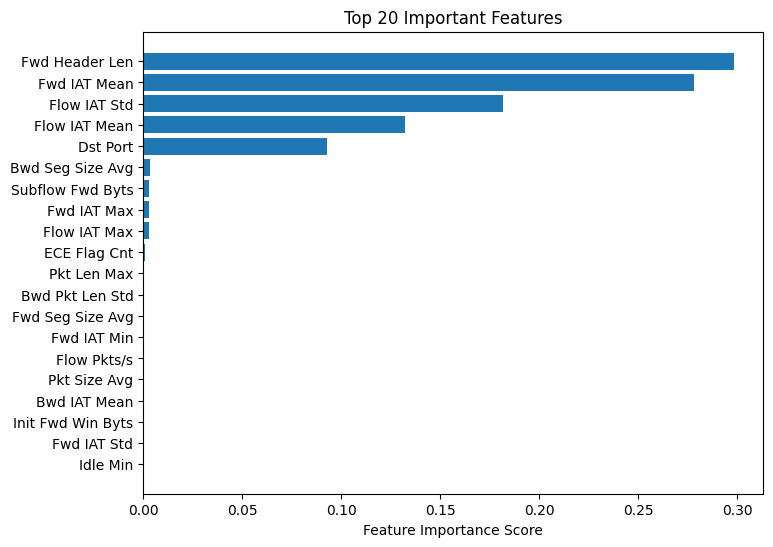

In [ ]:
import matplotlib.pyplot as plt

# Fit the BaggingClassifier model to the data
rf.fit(X_train, y_train)

# Get feature importance scores
importance_scores = rf.estimators_[0].feature_importances_

# Get feature names
feature_names = X_train.columns.tolist()

# Sort feature importance scores and feature names in descending order of importance scores
sorted_indices = importance_scores.argsort()[::-1][:20]
sorted_importance_scores = importance_scores[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Create a horizontal bar chart of top 20 feature importance scores
fig, ax = plt.subplots(figsize=(8, 6))
y_pos = range(len(sorted_feature_names))
ax.barh(y_pos, sorted_importance_scores, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(sorted_feature_names)
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel('Feature Importance Score')
ax.set_title('Top 20 Important Features')
plt.show()




### **Visualization of Classification Report**

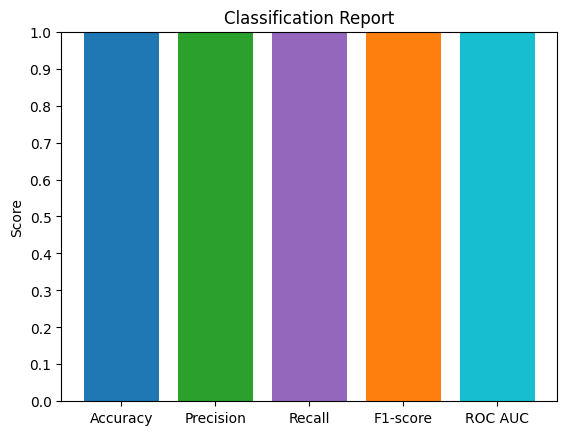

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Convert y_true and y_pred to binary values
threshold = 0.5
y_pred_binary = [1 if y >= threshold else 0 for y in y_pred]
y_test_binary = [1 if y >= threshold else 0 for y in y_test]

# Create confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Create classification report
cr = classification_report(y_test_binary, y_pred_binary)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test_binary, y_pred_binary)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)

# Define colors for each bar in the classification report
colors = ['#1f77b4', '#2ca02c', '#9467bd', '#ff7f0e', '#17becf']

# Calculate and store classification report metrics
cr_metrics = classification_report(y_test_binary, y_pred_binary, output_dict=True)
accuracy = cr_metrics['accuracy']
precision = cr_metrics['1']['precision']
recall = cr_metrics['1']['recall']
f1 = cr_metrics['1']['f1-score']

# Plot classification report as bar chart
plt.bar(["Accuracy", "Precision", "Recall", "F1-score", "ROC AUC"], [accuracy, precision, recall, f1, roc_auc], color=colors)
plt.title("Classification Report")
plt.ylabel("Score")
plt.ylim([0, 1])
plt.yticks([i/10 for i in range(0,11)])  # Set y-axis ticks to 0.1 increments

# Add legend for colors
green_patch = plt.Rectangle((0,0),1,1,fc='#2ca02c', edgecolor = 'none')
blue_patch = plt.Rectangle((0,0),1,1,fc='#1f77b4', edgecolor = 'none')
mixed_patch = plt.Rectangle((0,0),1,1,fc='#17becf', edgecolor = 'none')
#plt.legend([green_patch, blue_patch, mixed_patch], ['Green', 'Blue', 'Mixed'], loc="lower right")

plt.show()

### **Confusion Matrix**

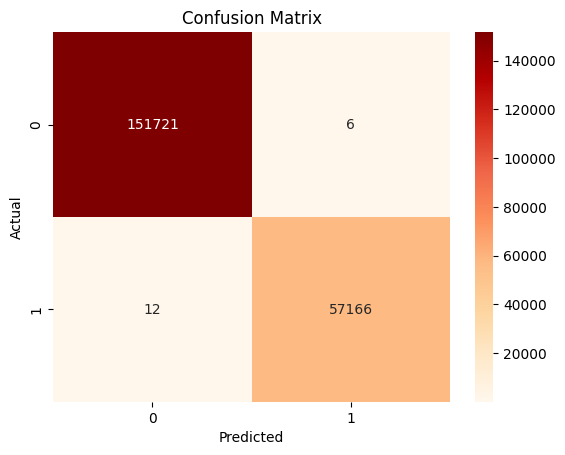

In [ ]:
# Visualization of confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using heatmap
sns.heatmap(cm, annot=True, cmap='OrRd', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **Visualization of Real and Predicted Data**

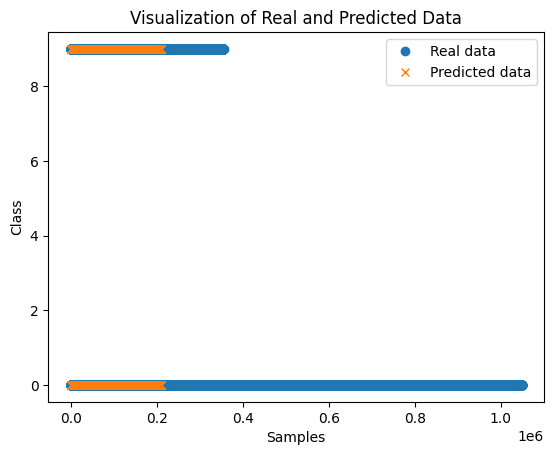

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(y_test, 'o', label='Real data')
plt.plot(y_pred, 'x', label='Predicted data')
plt.title('Visualization of Real and Predicted Data')
plt.xlabel('Samples')
plt.ylabel('Class')
plt.legend()
plt.show()

### **ROC Curve for True Positive Rate and False Positive Rate**

AUC Score: 1.0000


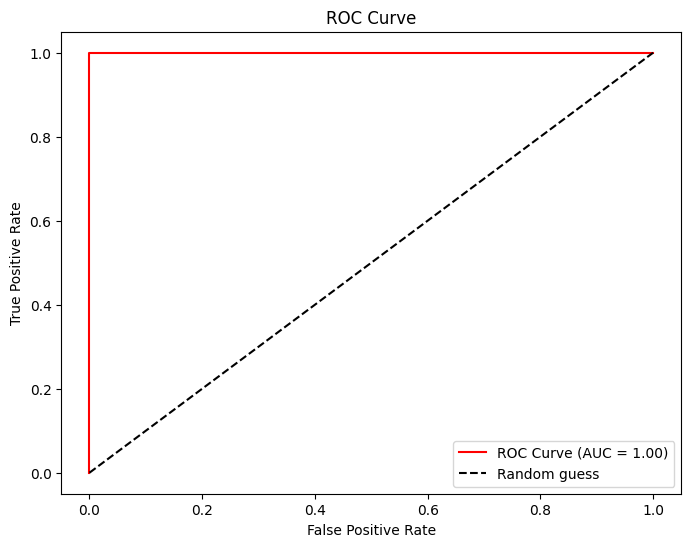

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Change class labels to 0 and 1
y_test_new = np.where(y_test == 9, 1, 0)

# Get predicted probabilities for positive class
y_prob = rf.predict_proba(X_test)[:, 1]

# Compute True Positive Rate and False Positive Rate at different thresholds
fpr, tpr, thresholds = roc_curve(y_test_new, y_prob)

# Compute AUC score
auc_score = roc_auc_score(y_test_new, y_prob)

print(f"AUC Score: {auc_score:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### **Log-Loss plot with respect to predicted probabilities**

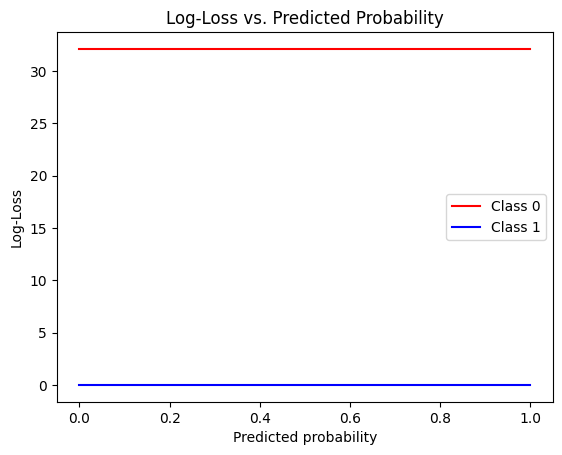

In [ ]:
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# Get predicted probabilities for test set
y_prob = rf.predict_proba(X_test)

# Calculate mean log-loss for each class
log_losses = [log_loss(y_test, y_prob[:, i]) for i in range(len(rf.classes_))]

# Plot log-loss values against predicted probabilities
plt.plot([y_prob[:, 0].min(), y_prob[:, 0].max()], [log_losses[0], log_losses[0]], 'r-', label='Class 0')
plt.plot([y_prob[:, 1].min(), y_prob[:, 1].max()], [log_losses[1], log_losses[1]], 'b-', label='Class 1')
plt.xlabel('Predicted probability')
plt.ylabel('Log-Loss')
plt.title('Log-Loss vs. Predicted Probability')
plt.legend()
plt.show()

### **Accuracy of the Model When the Number of Trees in Random Forest is changing**

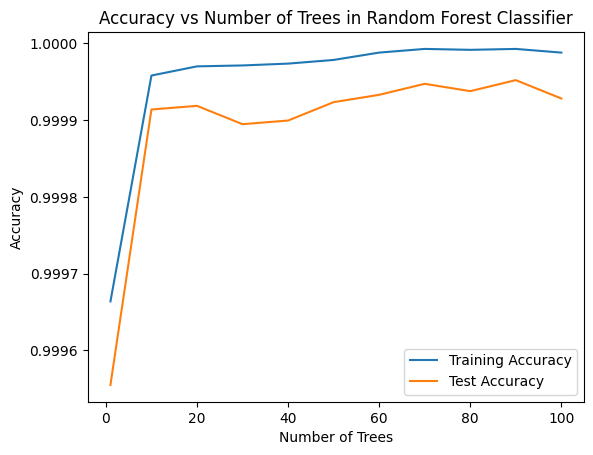

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[relevant_features], y, test_size=0.2, random_state=42)

# Create a list of the number of trees to test
n_trees = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create empty lists to store accuracy values for each number of trees
train_accuracy = []
test_accuracy = []

# Loop through each number of trees
for n in n_trees:
    # Create a random forest classifier with n trees
    rf = RandomForestClassifier(n_estimators=n, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=42, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
    # Fit the model on the training data
    rf.fit(X_train, y_train)
    # Calculate accuracy on training data
    train_acc = rf.score(X_train, y_train)
    #print (train_acc)
    # Append the training accuracy to the list
    train_accuracy.append(train_acc)
    # Calculate accuracy on test data
    y_pred = rf.predict(X_test)

    # Calculate accuracy on test set
    test_acc = accuracy_score(y_test, y_pred)
    #print(test_acc)

    # Append the test accuracy to the list
    test_accuracy.append(test_acc)

# Create a line plot of the accuracy vs number of trees
plt.plot(n_trees, train_accuracy, label='Training Accuracy')
plt.plot(n_trees, test_accuracy, label='Test Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Trees in Random Forest Classifier')
plt.legend()
plt.show()


## **Model Developing with Ensemble (Bagging) and Various ML Algorithms**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import time


# Initialize individual classifiers
svm = SVC(kernel='linear', C=0.1)
tree = DecisionTreeClassifier()
nb = GaussianNB()
nn = MLPClassifier(hidden_layer_sizes=(16,), max_iter=1000, solver='adam', random_state=42)

# Initialize Bagging classifier with all algorithms
bagging = BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=42, verbose=0)



start_time = time.time()#Training time starting

# Fit model
bagging.fit(X_train, y_train)

end_time = time.time()#Training time ending
training_time = end_time - start_time

start_pred_time = time.time()#Testing time starting


# Make predictions on test set
y_pred = bagging.predict(X_test)

end_pred_time = time.time()#Testing time ending

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=0, zero_division=1)
recall = recall_score(y_test, y_pred, pos_label=0, zero_division=1)
f1 = f1_score(y_test, y_pred, pos_label=0, zero_division=1)


# Print metrics
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1-score: {f1:.5f}')
print(f"Training time: {training_time:.5f} seconds")
print(f'Testing Time: {end_pred_time - start_pred_time:.5f} seconds')

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print(f'Confusion Matrix:\n{cm}')

# Extract TP, FP, FN, TN values
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[0, 0]

# Print TP, FP, FN, TN values
print(f'TP: {TP}')
print(f'FP: {FP}')
print(f'FN: {FN}')
print(f'TN: {TN}')

# Calculate TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

# Print TPR and FPR
print(f'True Positive Rate (TPR): {TPR:.5f}')
print(f'False Positive Rate (FPR): {FPR:.5f}')

# Calculate BACC
bacc = round((TP / (TP + FN) + TN / (TN + FP)) / 2, 5)

# Calculate MCC
mcc = round((TP * TN - FP * FN) / ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5, 5)

print("BACC: ", bacc)
print("MCC: ", mcc)

error_rate = 1 - accuracy
print(f'Error rate: {error_rate:.5f}')

train_accuracy = bagging.score(X_train, y_train)
print(f'Training accuracy: {train_accuracy:.5f}')



# Make predictions on test set
y_pred = bagging.predict(X_test)

# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Test Accuracy: {test_accuracy:.5f}')


kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa:.5f}")
# Calculate observed accuracy (Po)
Po = np.sum(np.diag(cm)) / np.sum(cm)
print(f"Observed Accuracy (Po): {Po:.5f}")

# Calculate expected accuracy (Pe)
total_samples = np.sum(cm)
total_agreements = np.sum(np.sum(cm, axis=0) * np.sum(cm, axis=1))
Pe = total_agreements / (total_samples * total_samples)
print(f"Expected Accuracy (Pe): {Pe:.5f}")


# Calculate AUC score
y_prob = bagging.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)

# Print AUC score
print(f'AUC score: {auc_score:.5f}')


Accuracy: 0.99998
Precision: 0.99999
Recall: 0.99999
F1-score: 0.99999
Training time: 80.77582 seconds
Testing Time: 0.81047 seconds
Confusion Matrix:
[[151223      2]
 [     2  56588]]
TP: 56588
FP: 2
FN: 2
TN: 151223
True Positive Rate (TPR): 0.99996
False Positive Rate (FPR): 0.00001
BACC:  0.99998
MCC:  nan
Error rate: 0.00002


<ipython-input-9-16826db12912>:88: RuntimeWarning: overflow encountered in long_scalars
  mcc = round((TP * TN - FP * FN) / ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5, 5)
<ipython-input-9-16826db12912>:88: RuntimeWarning: invalid value encountered in power
  mcc = round((TP * TN - FP * FN) / ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5, 5)


Training accuracy: 1.00000
Test Accuracy: 0.99998
Cohen's Kappa: 0.99995
Observed Accuracy (Po): 0.99998
Expected Accuracy (Pe): 0.60369
AUC score: 0.99999


## **Model Developing with Ensemble (Adaboost/DT) Techniques**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X[relevant_features], y, test_size=0.2, random_state=42)
# Define base classifiers
dt = DecisionTreeClassifier(max_depth=1)

# Define AdaBoost classifier with base classifiers
ada = AdaBoostClassifier(estimator=dt, n_estimators=50, learning_rate=1.0, algorithm='SAMME')

start_time = time.time()#Training time starting


# Train model
ada.fit(X_train, y_train)

end_time = time.time()#Training time ending
training_time = end_time - start_time

start_pred_time = time.time()#Testing time starting

# Test model
yboost_pred = ada.predict(X_test)

end_pred_time = time.time()#Testing time ending

# Evaluate model performance
accuracy = accuracy_score(y_test, yboost_pred)
precision = precision_score(y_test, yboost_pred, pos_label=0, zero_division=1)
recall = recall_score(y_test, yboost_pred, pos_label=0, zero_division=1)
f1 = f1_score(y_test, yboost_pred, pos_label=0, zero_division=1)


# Print metrics
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1-score: {f1:.5f}')
print(f"Training time: {training_time:.5f} seconds")
print(f'Testing Time: {end_pred_time - start_pred_time:.5f} seconds')

from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print(f'Confusion Matrix:\n{cm}')

# Extract TP, FP, FN, TN values
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[0, 0]

# Print TP, FP, FN, TN values
print(f'TP: {TP}')
print(f'FP: {FP}')
print(f'FN: {FN}')
print(f'TN: {TN}')

# Calculate TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

# Print TPR and FPR
print(f'True Positive Rate (TPR): {TPR:.5f}')
print(f'False Positive Rate (FPR): {FPR:.5f}')

# Calculate BACC
bacc = round((TP / (TP + FN) + TN / (TN + FP)) / 2, 5)

# Calculate MCC
mcc = round((TP * TN - FP * FN) / ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5, 5)

print("BACC: ", bacc)
print("MCC: ", mcc)

error_rate = 1 - accuracy
print(f'Error rate: {error_rate:.5f}')

train_accuracy = ada.score(X_train, y_train)
print(f'Training accuracy: {train_accuracy:.5f}')



# Make predictions on test set
yboost_pred = ada.predict(X_test)

# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, yboost_pred)

print(f'Test Accuracy: {test_accuracy:.5f}')


kappa = cohen_kappa_score(y_test, yboost_pred)
print(f"Cohen's Kappa: {kappa:.5f}")
# Calculate observed accuracy (Po)
Po = np.sum(np.diag(cm)) / np.sum(cm)
print(f"Observed Accuracy (Po): {Po:.5f}")

# Calculate expected accuracy (Pe)
total_samples = np.sum(cm)
total_agreements = np.sum(np.sum(cm, axis=0) * np.sum(cm, axis=1))
Pe = total_agreements / (total_samples * total_samples)
print(f"Expected Accuracy (Pe): {Pe:.5f}")


# Calculate AUC score
y_prob = ada.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)

# Print AUC score
print(f'AUC score: {auc_score:.5f}')

Accuracy: 0.99975
Precision: 0.99967
Recall: 0.99999
F1-score: 0.99983
Training time: 211.90822 seconds
Testing Time: 1.62705 seconds
Confusion Matrix:
[[151223      2]
 [     2  56588]]
TP: 56588
FP: 2
FN: 2
TN: 151223
True Positive Rate (TPR): 0.99996
False Positive Rate (FPR): 0.00001
BACC:  0.99998
MCC:  nan
Error rate: 0.00025


<ipython-input-10-89d6a4448cd5>:78: RuntimeWarning: overflow encountered in long_scalars
  mcc = round((TP * TN - FP * FN) / ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5, 5)
<ipython-input-10-89d6a4448cd5>:78: RuntimeWarning: invalid value encountered in power
  mcc = round((TP * TN - FP * FN) / ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5, 5)


Training accuracy: 0.99976
Test Accuracy: 0.99975
Cohen's Kappa: 0.99937
Observed Accuracy (Po): 0.99998
Expected Accuracy (Pe): 0.60369
AUC score: 1.00000


## **Model Developing with Ensemble (Gradient Boosting) Techniques**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X[relevant_features], y, test_size=0.2, random_state=42)

# Define base classifier
dt = DecisionTreeClassifier(max_depth=1)

# Define Gradient Boosting classifier with base classifier
gb = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, max_depth=3)

start_time = time.time() # Training time starting

# Train model
gb.fit(X_train, y_train)

end_time = time.time() # Training time ending
training_time = end_time - start_time

start_pred_time = time.time() # Testing time starting

# Test model
ygb_pred = gb.predict(X_test)

end_pred_time = time.time() # Testing time ending

# Evaluate model performance
accuracy = accuracy_score(y_test, ygb_pred)
precision = precision_score(y_test, ygb_pred, pos_label=0, zero_division=1)
recall = recall_score(y_test, ygb_pred, pos_label=0, zero_division=1)
f1 = f1_score(y_test, ygb_pred, pos_label=0, zero_division=1)

# Print metrics
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1-score: {f1:.5f}')
print(f"Training time: {training_time:.5f} seconds")
print(f'Testing Time: {end_pred_time - start_pred_time:.5f} seconds')

# Calculate confusion matrix
cm = confusion_matrix(y_test, ygb_pred)

# Print confusion matrix
print(f'Confusion Matrix:\n{cm}')

# Extract TP, FP, FN, TN values
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[0, 0]

# Print TP, FP, FN, TN values
print(f'TP: {TP}')
print(f'FP: {FP}')
print(f'FN: {FN}')
print(f'TN: {TN}')

# Calculate TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

# Print TPR and FPR
print(f'True Positive Rate (TPR): {TPR:.4f}')
print(f'False Positive Rate (FPR): {FPR:.4f}')

# Calculate BACC
bacc = round((TP / (TP + FN) + TN / (TN + FP)) / 2, 4)

# Calculate MCC
mcc = round((TP * TN - FP * FN) / ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5, 5)

print("BACC: ", bacc)
print("MCC: ", mcc)

error_rate = 1 - test_accuracy
print(f'Error rate: {error_rate:.5f}')

train_accuracy = gb.score(X_train, y_train)
print(f'Training accuracy: {train_accuracy:.5f}')


# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, ygb_pred)

print(f'Test Accuracy: {test_accuracy:.5f}')

kappa = cohen_kappa_score(y_test, ygb_pred)
print(f"Cohen's Kappa: {kappa:.5f}")

# Calculate observed accuracy (Po)
Po = np.sum(np.diag(cm)) / np.sum(cm)
print(f"Observed Accuracy (Po): {Po:.5f}")

# Calculate expected accuracy (Pe)
total_samples = np.sum(cm)
total_agreements = np.sum(np.sum(cm, axis=0) * np.sum(cm, axis=1))
Pe = total_agreements / (total_samples * total_samples)
print(f"Expected Accuracy (Pe): {Pe:.5f}")

# Calculate AUC score
y_prob = gb.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)

# Print AUC score
print(f'AUC score: {auc_score:.5f}')


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Accuracy: 0.99993
Precision: 0.99992
Recall: 0.99999
F1-score: 0.99995
Training time: 1039.89390 seconds
Testing Time: 0.78913 seconds
Confusion Matrix:
[[151223      2]
 [    12  56578]]
TP: 56578
FP: 2
FN: 12
TN: 151223
True Positive Rate (TPR): 0.9998
False Positive Rate (FPR): 0.0000
BACC:  0.9999
MCC:  nan
Error rate: 0.00025


<ipython-input-11-b52eb1423ac1>:75: RuntimeWarning: overflow encountered in long_scalars
  mcc = round((TP * TN - FP * FN) / ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5, 5)
<ipython-input-11-b52eb1423ac1>:75: RuntimeWarning: invalid value encountered in power
  mcc = round((TP * TN - FP * FN) / ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5, 5)


Training accuracy: 0.99996
Test Accuracy: 0.99993
Cohen's Kappa: 0.99983
Observed Accuracy (Po): 0.99993
Expected Accuracy (Pe): 0.60371
AUC score: 1.00000


## **Model Developing with Ensemble (Gradient XGBoost) Techniques**

In [ ]:
from xgboost import XGBClassifier
# Replace 9s with 1s in y
y = np.where(y == 9, 1, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[relevant_features], y, test_size=0.2, random_state=42)

# Define XGBoost classifier
xgb = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)

start_time = time.time() # Training time starting

# Train model
xgb.fit(X_train, y_train)

end_time = time.time() # Training time ending
training_time = end_time - start_time

start_pred_time = time.time() # Testing time starting

# Test model
y_xgb_pred = xgb.predict(X_test)

end_pred_time = time.time() # Testing time ending

# Evaluate model performance
accuracy = accuracy_score(y_test, y_xgb_pred)
precision = precision_score(y_test, y_xgb_pred, pos_label=0, zero_division=1)
recall = recall_score(y_test, y_xgb_pred, pos_label=0, zero_division=1)
f1 = f1_score(y_test, y_xgb_pred, pos_label=0, zero_division=1)

# Print metrics
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1-score: {f1:.5f}')
print(f"Training time: {training_time:.5f} seconds")
print(f'Testing Time: {end_pred_time - start_pred_time:.5f} seconds')


# Calculate confusion matrix
cm = confusion_matrix(y_test, y_xgb_pred)

# Print confusion matrix
print(f'Confusion Matrix:\n{cm}')

# Extract TP, FP, FN, TN values
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[0, 0]

# Print TP, FP, FN, TN values
print(f'TP: {TP}')
print(f'FP: {FP}')
print(f'FN: {FN}')
print(f'TN: {TN}')

# Calculate TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

# Print TPR and FPR
print(f'True Positive Rate (TPR): {TPR:.5f}')
print(f'False Positive Rate (FPR): {FPR:.5f}')

# Calculate BACC
bacc = round((TP / (TP + FN) + TN / (TN + FP)) / 2, 5)

# Calculate MCC
mcc = round((TP * TN - FP * FN) / ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5, 5)

print("BACC: ", bacc)
print("MCC: ", mcc)

error_rate = 1 - test_accuracy
print(f'Error rate: {error_rate:.5f}')

train_accuracy = xgb.score(X_train, y_train)
print(f'Training accuracy: {train_accuracy:.5f}')


# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, y_xgb_pred)

print(f'Test Accuracy: {test_accuracy:.5f}')

kappa = cohen_kappa_score(y_test, y_xgb_pred)
print(f"Cohen's Kappa: {kappa:.5f}")

# Calculate observed accuracy (Po)
Po = np.sum(np.diag(cm)) / np.sum(cm)
print(f"Observed Accuracy (Po): {Po:.5f}")

# Calculate expected accuracy (Pe)
total_samples = np.sum(cm)
total_agreements = np.sum(np.sum(cm, axis=0) * np.sum(cm, axis=1))
Pe = total_agreements / (total_samples * total_samples)
print(f"Expected Accuracy (Pe): {Pe:.4f}")


# Compute AUC score
auc_score = roc_auc_score(y_test, y_xgb_pred)

print(f'AUC Score: {auc_score:.5f}')


Accuracy: 0.99996
Precision: 0.99997
Recall: 0.99998
F1-score: 0.99997
Training time: 306.33934 seconds
Testing Time: 0.46625 seconds
Confusion Matrix:
[[151222      3]
 [     5  56585]]
TP: 56585
FP: 3
FN: 5
TN: 151222
True Positive Rate (TPR): 0.99991
False Positive Rate (FPR): 0.00002
BACC:  0.99995
MCC:  nan
Error rate: 0.00007


<ipython-input-12-81e021c4672e>:71: RuntimeWarning: overflow encountered in long_scalars
  mcc = round((TP * TN - FP * FN) / ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5, 5)
<ipython-input-12-81e021c4672e>:71: RuntimeWarning: invalid value encountered in power
  mcc = round((TP * TN - FP * FN) / ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5, 5)


Training accuracy: 0.99997
Test Accuracy: 0.99996
Cohen's Kappa: 0.99990
Observed Accuracy (Po): 0.99996
Expected Accuracy (Pe): 0.6037
AUC Score: 0.99995


## **Model Developing with Ensemble (Simple Stacking) Techniques**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[relevant_features], y, test_size=0.2, random_state=42)

# Initialize base classifiers
svm = SVC(kernel='linear', C=0.1)
tree = DecisionTreeClassifier()
nb = GaussianNB()

start_time = time.time() # Training time starting

# Fit base classifiers on training set
svm.fit(X_train, y_train)
tree.fit(X_train, y_train)
nb.fit(X_train, y_train)
end_time = time.time() # Training time ending
training_time = end_time - start_time

start_pred_time = time.time() # Testing time starting

# Make predictions on validation set using base classifiers
svm_pred = svm.predict(X_test)
tree_pred = tree.predict(X_test)
nb_pred = nb.predict(X_test)

# Combine base classifiers' predictions as meta-features
meta_features = np.column_stack((svm_pred, tree_pred, nb_pred))

# Train logistic regression meta-classifier on meta-features
meta_classifier = LogisticRegression(random_state=42)
meta_classifier.fit(meta_features, y_test)

start_pred_time = time.time() # Testing time starting

# Make predictions on test set using ensemble model
svm_pred_test = svm.predict(X_test)
tree_pred_test = tree.predict(X_test)
nb_pred_test = nb.predict(X_test)

meta_features_test = np.column_stack((svm_pred_test, tree_pred_test, nb_pred_test))
ensemble_pred_test = meta_classifier.predict(meta_features_test)

end_pred_time = time.time() # Testing time ending

# Evaluate ensemble model performance
accuracy = accuracy_score(y_test, ensemble_pred_test)
precision = precision_score(y_test, ensemble_pred_test, pos_label=0, zero_division=1)
recall = recall_score(y_test, ensemble_pred_test, pos_label=0, zero_division=1)
f1 = f1_score(y_test, ensemble_pred_test, pos_label=0, zero_division=1)

# Print metrics
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1-score: {f1:.5f}')
print(f"Training time: {training_time:.5f} seconds")
print(f'Testing Time: {end_pred_time - start_pred_time:.5f} seconds')


# Calculate confusion matrix
cm = confusion_matrix(y_test, ensemble_pred_test)

# Print confusion matrix
print(f'Confusion Matrix:\n{cm}')

# Extract TP, FP, FN, TN values
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[0, 0]

# Print TP, FP, FN, TN values
print(f'TP: {TP}')
print(f'FP: {FP}')
print(f'FN: {FN}')
print(f'TN: {TN}')

# Calculate TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

# Print TPR and FPR
print(f'True Positive Rate (TPR): {TPR:.5f}')
print(f'False Positive Rate (FPR): {FPR:.5f}')

# Calculate BACC
bacc = round((TP / (TP + FN) + TN / (TN + FP)) / 2, 5)

# Calculate MCC
mcc = round((TP * TN - FP * FN) / ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5, 5)

print("BACC: ", bacc)
print("MCC: ", mcc)

error_rate = 1 - test_accuracy
print(f'Error rate: {error_rate:.5f}')

# Calculate training accuracy
# Make predictions on training set using ensemble model
svm_pred_train = svm.predict(X_train)
tree_pred_train = tree.predict(X_train)
nb_pred_train = nb.predict(X_train)

meta_features_train = np.column_stack((svm_pred_train, tree_pred_train, nb_pred_train))
ensemble_pred_train = meta_classifier.predict(meta_features_train)

# Evaluate ensemble model performance on training set
accuracy_train = accuracy_score(y_train, ensemble_pred_train)

# Print metrics
print(f'Training Accuracy: {accuracy_train:.5f}')



# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, ensemble_pred_test)

print(f'Test Accuracy: {test_accuracy:.5f}')

kappa = cohen_kappa_score(y_test, ensemble_pred_test)
print(f"Cohen's Kappa: {kappa:.5f}")

# Calculate observed accuracy (Po)
Po = np.sum(np.diag(cm)) / np.sum(cm)
print(f"Observed Accuracy (Po): {Po:.5f}")

# Calculate expected accuracy (Pe)
total_samples = np.sum(cm)
total_agreements = np.sum(np.sum(cm, axis=0) * np.sum(cm, axis=1))
Pe = total_agreements / (total_samples * total_samples)
print(f"Expected Accuracy (Pe): {Pe:.5f}")



# Calculate AUC score
auc_score = roc_auc_score(y_test, ensemble_pred_test)

# Print AUC score
print(f'AUC score: {auc_score:.5f}')


**Completed without stacking**